# SPADE_PR_and_TEMP_first_look.ipynb

```
H Thompson
UQAM
April 2020
```


## Imports

In [16]:
import numpy as np 
import pandas as pd

from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from netCDF4 import Dataset as cdf4_ds

from metpy.units import units

from scipy.ndimage import gaussian_filter


import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
import matplotlib.ticker as ticker


from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature


%matplotlib inline
plt.style.use('seaborn-ticks')

In [17]:
Powerline_deg = [50.82423333, -115.1972167]
Junction_deg = [50.785568, -115.160941]
Nipika_deg = [50.61183889, -115.8008167]
Storm_L_deg = [51.25283667, -115.9988733]
BGI_deg = [51.026681, -115.034411]

## Files

In [18]:
pr_nc_file = cdf4_ds('/Users/olivier1/Documents/Data_stage/pr_CA_Rockies_3km_P3_ERA5-1h_ISBA_USGS.nc') # file shape[time, lat, lon]
tas_nc_file = cdf4_ds('/Users/olivier1/Documents/Data_stage/tas_CA_Rockies_3km_P3_ERA5-1h_ISBA_USGS.nc')

In [19]:
times = pr_nc_file.variables['time'][:]
idx = pd.date_range(start='2019-04-15 01:0:00', freq='H', periods=len(times))

In [20]:
# pr_nc_file.variables
tas_nc_file.variables

{'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(rlat, rlon)
     units: degrees_north
     long_name: latitude
     standard_name: latitude
     actual_range: [39.18087769 61.79791641]
 unlimited dimensions: 
 current shape = (655, 556)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lev': <class 'netCDF4._netCDF4.Variable'>
 float64 lev(lev)
     units: m
     long_name: hybrid height coordinate
     standard_name: atmosphere_hybrid_height_coordinate
     axis: Z
     positive: up
     coordinate_defines: point
     actual_range: [1.5 1.5]
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(rlat, rlon)
     units: degrees_east
     long_name: longitude
     standard_name: longitude
     actual_range: [-127.83721924  -94.27130127]
 unlimited dimensions: 
 current shape = (655, 556)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'rl

In [21]:
df = pd.DataFrame(index=idx)

In [22]:
lats = pr_nc_file.variables['lat'][:,:]
lons = pr_nc_file.variables['lon'][:,:]


In [23]:
a = (lons - Nipika_deg[1])**2 + (lats - Nipika_deg[0])**2 
b = (lons - Junction_deg[1])**2 + (lats - Junction_deg[0])**2
c = (lons - Powerline_deg[1])**2 + (lats - Junction_deg[0])**2

ind_a = np.unravel_index(np.argmin(a, axis=None), a.shape)
ind_b = np.unravel_index(np.argmin(b, axis=None), b.shape)
ind_c = np.unravel_index(np.argmin(c, axis=None), c.shape)

Nipika_I = ind_a[0]
Nipika_J = ind_a[1]
Junction_I = ind_b[0]
Junction_J = ind_b[1]
Powerline_I = ind_c[0]
Powerline_J = ind_c[1]

In [24]:
lats[Powerline_I,Powerline_J],lons[Powerline_I,Powerline_J] 

(50.79841613769531, -115.1871337890625)

In [25]:
print(Nipika_I, Nipika_J)
print(Powerline_I, Powerline_J)
print(Junction_I, Junction_J)

405 153
403 169
402 169


In [26]:
df['Nipika_pr'] = pr_nc_file.variables['pr'][:,Nipika_I,Nipika_J] * 3600
df['Nipika_tas'] = tas_nc_file.variables['tas'][:,Nipika_I,Nipika_J] - 273.15

/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: _FillValue not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  
/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: WARNING: _FillValue not used since it
cannot be safely cast to variable data type
  


In [27]:
df['Junction_pr'] = pr_nc_file.variables['pr'][:,Junction_I,Junction_J] * 3600
df['Junction_tas'] = tas_nc_file.variables['tas'][:,Junction_I,Junction_J] - 273.15

/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: _FillValue not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  
/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: WARNING: _FillValue not used since it
cannot be safely cast to variable data type
  


In [28]:
df['Powerline_pr'] = pr_nc_file.variables['pr'][:,Powerline_I,Powerline_J] * 3600
df['Powerline_tas'] = tas_nc_file.variables['tas'][:,Powerline_I,Powerline_J] - 273.15

/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: _FillValue not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  
/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: WARNING: _FillValue not used since it
cannot be safely cast to variable data type
  


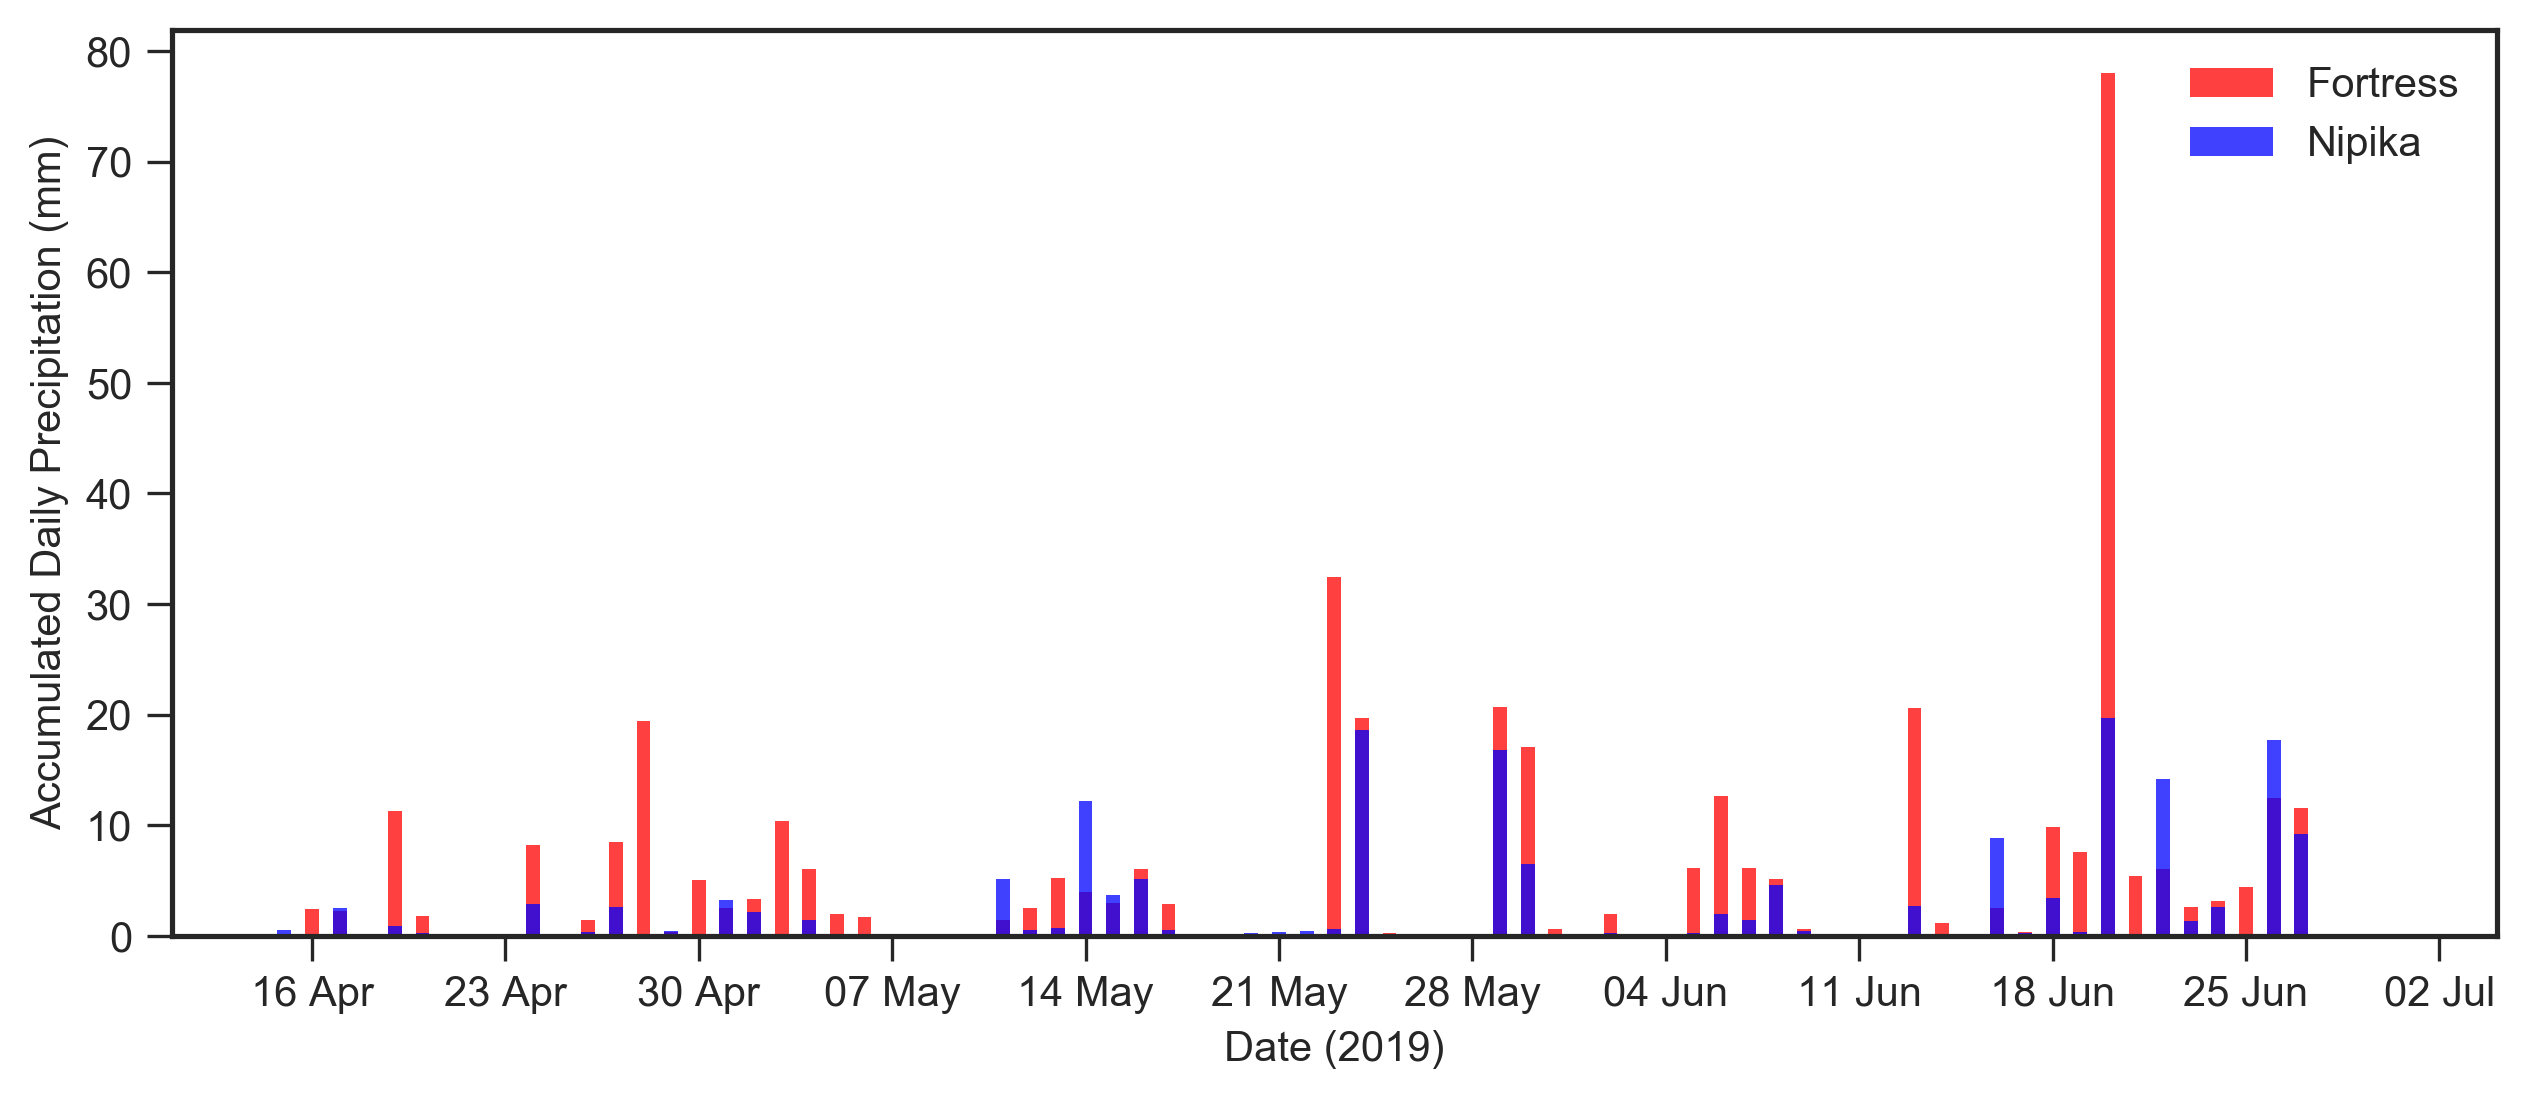

In [29]:
fig, ax = plt.subplots(figsize=(10,4), dpi=300, facecolor='white')

daily = df.resample('D').sum()

ax.bar(daily.index, daily.Powerline_pr, color='red', width=.5, alpha=.75)
ax.bar(daily.index, daily.Nipika_pr, color='blue', width=.5, alpha=.75)
ax.set_xticks([])

date_form = DateFormatter("%d %b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

ax.set_xlabel('Date (2019)')
ax.set_ylabel('Accumulated Daily Precipitation (mm)')
ax.legend(['Fortress','Nipika'])

In [ ]:
fig, ax = plt.subplots(figsize=(10,4), dpi=300, facecolor='white')

lw = 1.

df.Powerline_tas.plot(ax=ax, linewidth=lw, alpha=.5, color='red')
df.Nipika_tas.plot(ax=ax, linewidth=lw, alpha=.5, color='blue')

date_form = DateFormatter("%d %b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

ax.set_xlabel('Date (2019)')
ax.set_ylabel('Precipitation (mm/day)')

ax.legend(['Fortress','Nipika'])